In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogbreeds/"
arch = resnext50
sz = 299
bs = 28

In [3]:
# Set up transformation, trainig data, and model architecture
tfms = tfms_from_model(
    arch, 
    sz, 
    aug_tfms=transforms_side_on, 
    max_zoom=1.1)
data = ImageClassifierData.from_csv(
    PATH, 
    folder='train', 
    csv_fname=PATH + 'labels.csv', 
    suffix='.jpg',
    tfms=tfms, 
    bs=bs, 
    num_workers=4,
    test_name='test')
learn = ConvLearner.pretrained(
    arch, 
    data, 
    precompute=True, 
    ps=0.5)

In [4]:
img = PIL.Image.open(PATH + data.trn_ds.fnames[0])

In [5]:
img.size

(500, 375)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 241/293 [00:02<00:00, 85.28it/s, loss=10.9]


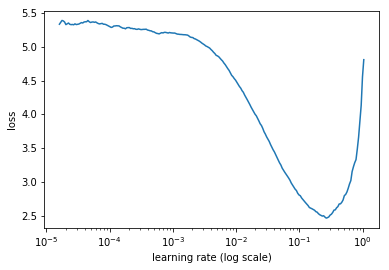

In [6]:
lrf = learn.lr_find()
learn.sched.plot()

In [8]:
learn.fit(1e-2, 6, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.325549   0.303261   0.90998   
    1      0.276088   0.321402   0.909002                     
    2      0.265205   0.347322   0.906067                     
    3      0.270061   0.311348   0.907534                     
    4      0.258391   0.296689   0.908513                     
    5      0.242061   0.330407   0.905577                     
    6      0.179392   0.299164   0.908513                     
    7      0.223738   0.290393   0.905577                     
    8      0.204462   0.325077   0.90411                      
    9      0.176197   0.355954   0.904599                     



[0.35595354, 0.9045988247819143]

## Differential learning rates

In [9]:
learn.unfreeze()
lr = np.array([1e-4, 1e-3, 1e-2])

In [ ]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.270401   0.285581   0.909002  
    1      0.295969   0.287301   0.913894                    
    2      0.303593   0.283617   0.911937                    
    3      0.319807   0.283869   0.90998                     
    4      0.326017   0.295565   0.91047                     
 40%|███▉      | 116/293 [00:30<00:45,  3.85it/s, loss=0.235]

## Predict on test set

In [ ]:
# Predictions for test dataset
preds = np.exp(learn.predict(is_test=True))

In [ ]:
# Filenames of test data
files_test = [x.split("/")[1].split(".")[0] for x in data.test_dl.dataset.fnames]
# Sample submission kaggle
submission = pd.read_csv('/home/paperspace/data/dogbreeds/sample_submission.csv')

In [ ]:
submission['id'] = files_test
submission.iloc[:,1:] = preds

In [ ]:
submission.to_csv('~/wd/dogbreeds/submission2.csv', index=False)

In [ ]:
!cd /home/paperspace/wd/dogbreeds/
!kg submit submission2.csv